In [152]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [122]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [123]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [124]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

In [125]:
# Load the dataset
df_market_data = pd.read_csv("Resources/crypto_market_data.csv")  # Replace with your actual file

# Initialize StandardScaler
scaler = StandardScaler()

# Select the columns to normalize
columns_to_scale = ["price_change_percentage_24h", "price_change_percentage_7d", 
                    "price_change_percentage_14d", "price_change_percentage_30d", 
                    "price_change_percentage_60d", "price_change_percentage_200d", 
                    "price_change_percentage_1y"]

# Apply StandardScaler to the selected columns
crypto_scaled = scaler.fit_transform(df_market_data[columns_to_scale])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(crypto_scaled, columns=columns_to_scale)

# Copy the 'coin_id' column from the original DataFrame
df_scaled['coin_id'] = df_market_data['coin_id']

# Set 'coin_id' as the index
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame with 'coin_id' as the index
print(df_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Prepare the Data

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [126]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [127]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
print(inertia_values)

c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[287.0, 212.1233420748626, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.48812315624117, 43.22469266658042, 32.86088447122681, 28.404884636873092, 24.116198421409198]


c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [128]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': range(1, 12),  
    'Inertia': inertia_values  
}
df_elbow = pd.DataFrame(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

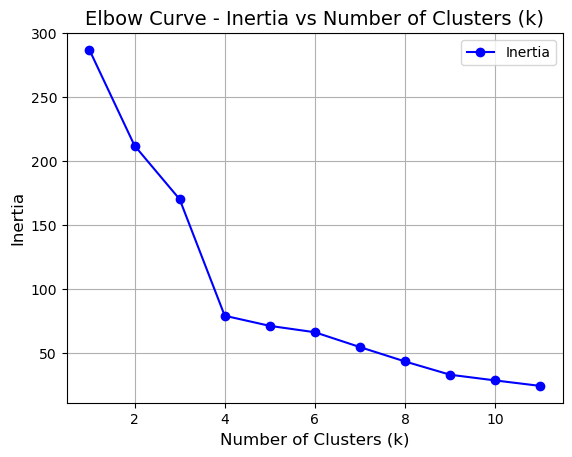

In [129]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot inertia values against the number of clusters (k)
plt.plot(range(1, 12), inertia_values, marker='o', linestyle='-', color='b', label='Inertia')

# Add labels and title
plt.title('Elbow Curve - Inertia vs Number of Clusters (k)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [130]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [131]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)

c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [132]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans.predict(df_scaled)

# Print the resulting array of cluster values.
print("Predicted Cluster Labels:\n", predicted_clusters)

Predicted Cluster Labels:
 [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [133]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()

In [134]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['Predicted_Cluster'] = predicted_clusters

# Display the copy of the scaled DataFrame
print(df_scaled_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [135]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_scaled_copy['coin_id'] = df_market_data['coin_id']

scatter_plot = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Predicted_Cluster',  
    colormap='viridis',  
    hover_cols=['coin_id'],  
    title='Cryptocurrency Clusters: 24h vs 7d Price Change',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    size=10,  
    marker='o',  
    width=600,  
    height=400  
)
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Predicted_Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [136]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [137]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
# View the scaled PCA data
print(df_pca.head())

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [138]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841

In [139]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_market_data['coin_id']

# Set the 'coin_id' column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(df_pca.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [140]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [141]:
# Create an empty list to store the inertia values
inertia_values_cluster = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):  # Loop through values of k from 1 to 11
    # Create a KMeans model with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the PCA data (df_market_data_pca)
    kmeans.fit(df_pca)
    
    # Append the inertia value to the inertia_values list
    inertia_values_cluster.append(kmeans.inertia_)

# Print the inertia values for each k
print(inertia_values_cluster)

c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[256.87408556789256, 182.3395300777565, 140.4318329840837, 49.66549665179737, 42.05190109791725, 31.749005244389007, 28.031869172552753, 19.451747206041347, 13.814081971558094, 10.630647573870965, 10.120242629957756]


c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [142]:
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):  # Loop through values of k from 1 to 11
   for k in range(1, 12):  # Loop through values of k from 1 to 11
    # Create a KMeans model with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the PCA data (df_pca)
    kmeans.fit(df_pca)
    
    # Append the inertia value to the inertia_values_pca list
    inertia_values_pca.append(kmeans.inertia_)

# Print the inertia values for each k stored in the list
print(inertia_values_pca)

c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[256.87408556789256, 182.3395300777565, 140.4318329840837, 49.66549665179737, 42.05190109791725, 31.749005244389007, 28.031869172552753, 19.451747206041347, 13.814081971558094, 10.630647573870965, 10.120242629957756, 256.87408556789256, 182.3395300777565, 140.4318329840837, 49.66549665179737, 42.05190109791725, 31.749005244389007, 28.031869172552753, 19.451747206041347, 13.814081971558094, 10.630647573870965, 10.120242629957756, 256.87408556789256, 182.3395300777565, 140.4318329840837, 49.66549665179737, 42.05190109791725, 31.749005244389007, 28.031869172552753, 19.451747206041347, 13.814081971558094, 10.630647573870965, 10.120242629957756, 256.87408556789256, 182.3395300777565, 140.4318329840837, 49.66549665179737, 42.05190109791725, 31.749005244389007, 28.031869172552753, 19.451747206041347, 13.814081971558094, 10.630647573870965, 10.120242629957756, 256.87408556789256, 182.3395300777565, 140.4318329840837, 49.66549665179737, 42.05190109791725, 31.749005244389007, 28.031869172552753,

c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [143]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': list(range(1, 12)),  
    'Inertia': inertia_values  
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow.head())

   Number of Clusters (k)     Inertia
0                       1  287.000000
1                       2  212.123342
2                       3  170.193571
3                       4   79.022435
4                       5   71.097914


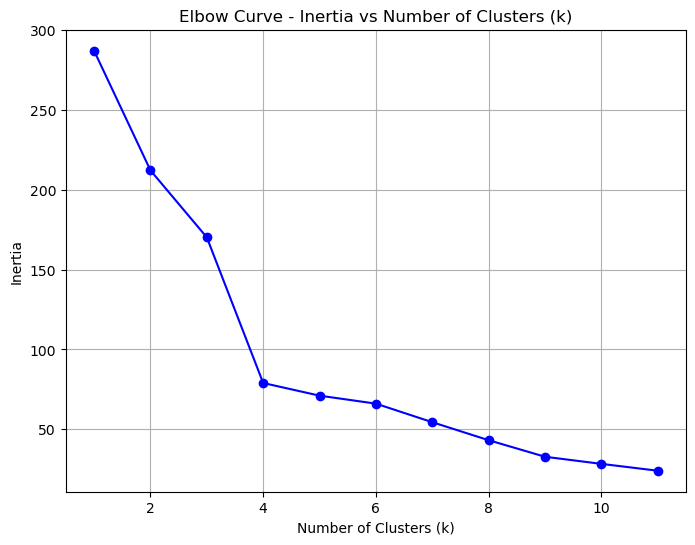

In [144]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['Number of Clusters (k)'], df_elbow['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve - Inertia vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)


# Display the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [145]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [146]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

c:\Users\Saint\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [147]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predicted_clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values
print(predicted_clusters)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [148]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copied DataFrame with the predicted clusters
df_pca_copy['Cluster'] = predicted_clusters

# Display the updated DataFrame
print(df_pca_copy.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [149]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_pca_copy['coin_id'] = df_market_data['coin_id']

scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',  # First principal component on the x-axis
    y='PC2',  # Second principal component on the y-axis
    c='Cluster',  # Color the points based on the cluster labels
    cmap='Set1',  # Choose a color map for better differentiation of clusters
    hover_cols=['coin_id'],  # Display the cryptocurrency names in the hover tool
    title='PCA Scatter Plot - Clusters',
    xlabel='PC1',
    ylabel='PC2',
    size=100,  # Adjust point size for visibility
    alpha=0.7  # Set transparency for the points
)

# Display the plot
scatter_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

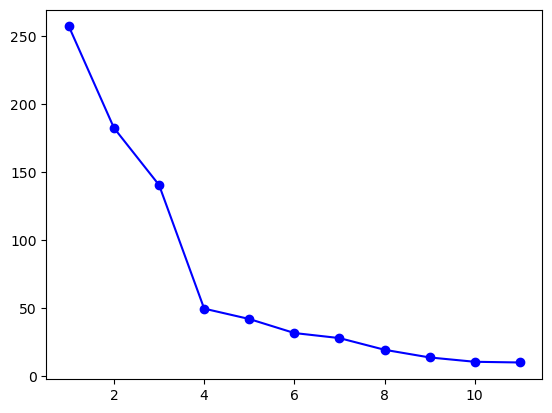

In [116]:
# Composite plot to contrast the Elbow curves
# Plot the Elbow curve for the original scaled data
plt.plot(df_elbow['Number of Clusters (k)'], df_elbow['Inertia'], marker='o', color='blue', label='Original Data')

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features gives better visual clarity at the expense of detailed variance being shown.